In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
labels = [
    [0, 4],
    [5, 9],
    [10, 14],
    [15, 19],
    [20, 24],
    [25, 29],
    [30, 34],
    [35, 39],
    [40, 44],
    [45, 49],
    [50, 54],
    [55, 59],
    [60, 64],
    [65, 100]
  ]

labels = ["-".join([str(j) for j in i]) for i in labels] 
print(labels)

['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-100']


In [103]:
def get_metrics(filename):
    df = pd.read_csv(filename)
    ndf = df.groupby("y").agg({'mse': ['mean', 'max', 'min']})
    ndf_mae = df.groupby("y").agg({'mae': ['mean', 'max', 'min']})
    return ndf,ndf_mae

def plot_data(data, metric='mse'):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 4))
    axes[0].set_title('Mean')
    axes[0].set_xlabel('')
    axes[1].set_title('Max')
    axes[1].set_xlabel('')
    axes[2].set_title('Min')
    axes[2].set_xlabel('')
    fig.suptitle(f'{metric} mean, max and min error by component', fontsize=16)

    plt.tight_layout()
    
    sns.barplot(data=data, x=labels, y=(metric, 'mean'), ax=axes[0])
    sns.barplot(data=data, x=labels, y=(metric, 'max'), ax=axes[1])
    sns.barplot(data=data, x=labels, y=(metric, 'min'), ax=axes[2])
    fig.set_size_inches(16, 6)  # Set the width and height in inches

    fig.savefig(metric )

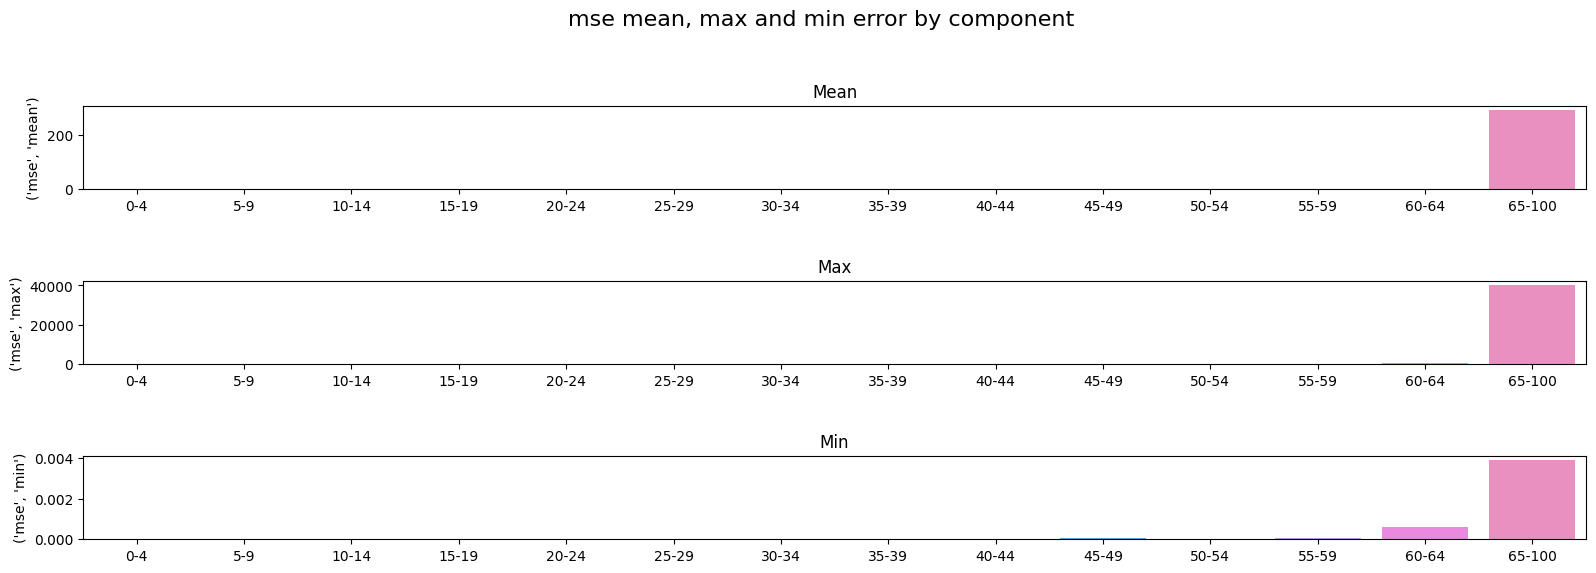

In [104]:
ndf_mse, ndf_mae = get_metrics("structured_regressor_test_results_by_component.csv")
plot_data(ndf_mse)

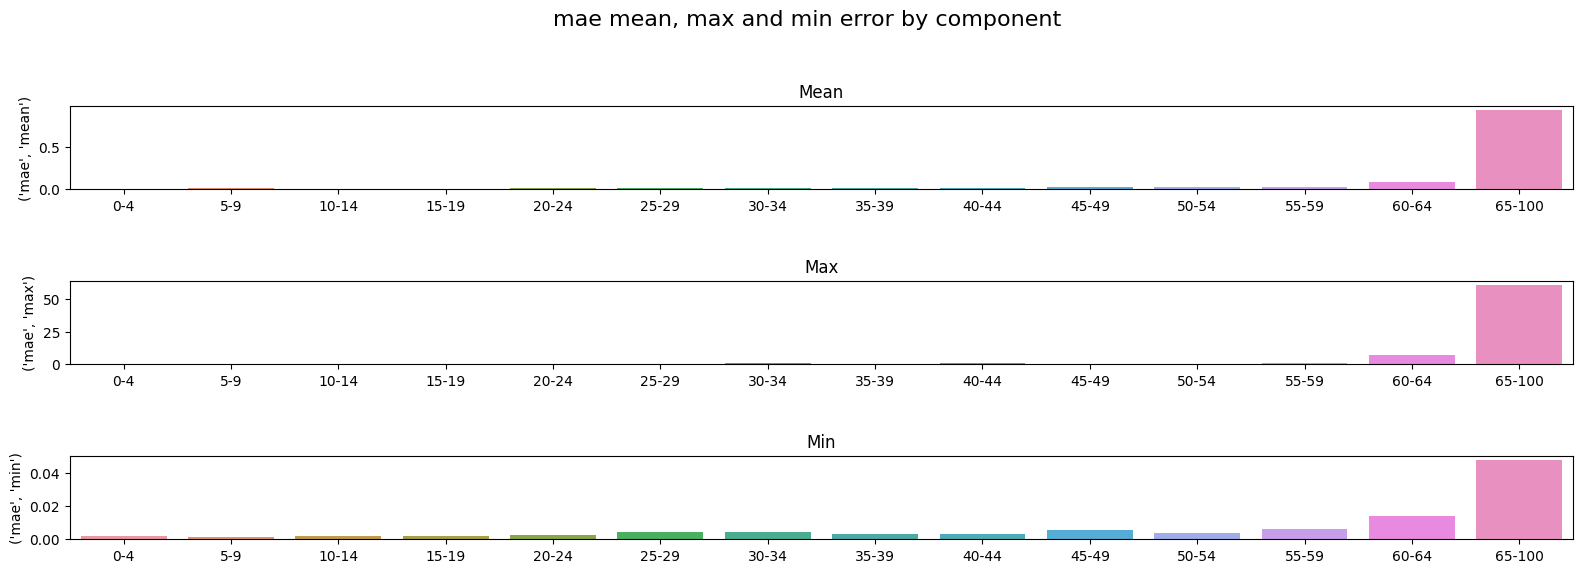

In [105]:
plot_data(ndf_mae, 'mae')